# Tarea 1 Aplicaciones de la matemática a la ingeniería.

Versión Jupyter Notebook.

# Trabajo en Python

Se importan las librerías necesarias.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from itertools import combinations # Scatterplot

Se leen y muestran los datos:

In [45]:
path = "column_2C.txt"
names_columns = [
          "incidencia pélvica",
          "inclinación pélvica",
          "ángulo de lordosis lumbar", 
          "pendiente sacra", 
          "radio pélvico",
          "grado de espondilolistesis",
          "status"]
# Read the text file and create a data frame
df = pd.read_csv(path, header=None, sep=" ", names=names_columns)
# Print the data frame
df.head()

,incidencia pélvica,inclinación pélvica,ángulo de lordosis lumbar,pendiente sacra,radio pélvico,grado de espondilolistesis,status
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [46]:
type(df)

pandas.core.frame.DataFrame

In [47]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incidencia pélvica          310 non-null    float64
 1   inclinación pélvica         310 non-null    float64
 2   ángulo de lordosis lumbar   310 non-null    float64
 3   pendiente sacra             310 non-null    float64
 4   radio pélvico               310 non-null    float64
 5   grado de espondilolistesis  310 non-null    float64
 6   status                      310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Notese que no existen datos faltantes.

## **<span style="color:red">a.</span>** ¿Cuántas observaciones hay en el conjunto de datos? ¿Cuántas observaciones corresponden a cada etiqueta?

In [48]:
df["status"].value_counts()

AB    210
NO    100
Name: status, dtype: int64

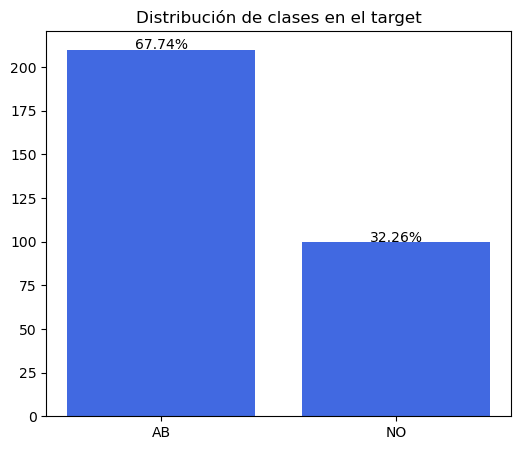

In [49]:
plt.figure(figsize = (6,5))
plt.bar(np.unique(df['status']),
        np.unique(df['status'], return_counts=True)[1],
        color = 'royalblue')
plt.title('Distribución de clases en el target')
# plt.xticks(rotation=90)

for i, v in enumerate(np.unique(df['status'], return_counts=True)[1]):
    plt.text(i, v+0.1, f'{v/len(df["status"]):.2%}', color='black', ha='center')

`Respuesta`: 
- En total hay 310 observaciones.
- Hay 210 observaciones en la etiqueta "AB" y 100 en las observaciones en la etiqueta "NO".

## **<span style="color:red">b.</span>** Realice histogramas para cada una de las covariables (separando las observaciones corresponden a cada etiqueta). Además, reporte medidas de tendencia central, dispersión y forma. Comente los resultados.

In [50]:
for status in pd.unique(df['status']):
    print(f'Medidas de tendencia central, dispersión y forma para: {status}')
    temp = df[df['status']==status].drop(['status'], axis=1)
    info = temp.describe().T
    info['skew'] = temp.skew()
    info['curtosis'] = temp.kurt()
    display(info)

Medidas de tendencia central, dispersión y forma para: AB


,count,mean,std,min,25%,50%,75%,max,skew,curtosis
incidencia pélvica,210.0,64.692143,17.661807,26.15,50.1050,65.275,77.5975,129.83,0.274841,0.202589
inclinación pélvica,210.0,19.791048,10.515653,-6.55,13.0475,18.795,24.8125,49.43,0.543336,0.165615
ángulo de lordosis lumbar,210.0,55.925190,19.668972,14.00,41.1175,56.150,68.1050,125.74,0.314309,-0.173225
pendiente sacra,210.0,44.901524,14.515133,13.37,34.3800,44.640,55.1425,121.43,0.650361,2.754752
radio pélvico,210.0,115.077381,14.090965,70.08,107.3075,115.650,123.1350,163.07,0.111110,1.034906
grado de espondilolistesis,210.0,37.777571,40.696738,-10.68,7.2600,31.945,55.3750,418.54,4.274374,35.952586


Medidas de tendencia central, dispersión y forma para: NO


,count,mean,std,min,25%,50%,75%,max,skew,curtosis
incidencia pélvica,100.0,51.6856,12.367900,30.74,42.8200,50.125,61.4725,89.83,0.747352,0.495784
inclinación pélvica,100.0,12.8218,6.778658,-5.85,8.8025,13.485,16.7875,29.89,-0.194265,0.189884
ángulo de lordosis lumbar,100.0,43.5423,12.361581,19.07,35.0000,42.640,51.6025,90.56,0.750793,1.220533
pendiente sacra,100.0,38.8638,9.623776,17.39,32.3425,37.060,44.6050,67.20,0.431472,0.125237
radio pélvico,100.0,123.8912,9.013755,100.50,118.1800,123.875,129.0400,147.89,0.010833,0.117276
grado de espondilolistesis,100.0,2.1870,6.307020,-11.06,-1.5100,1.155,4.9675,31.17,1.691499,5.596433


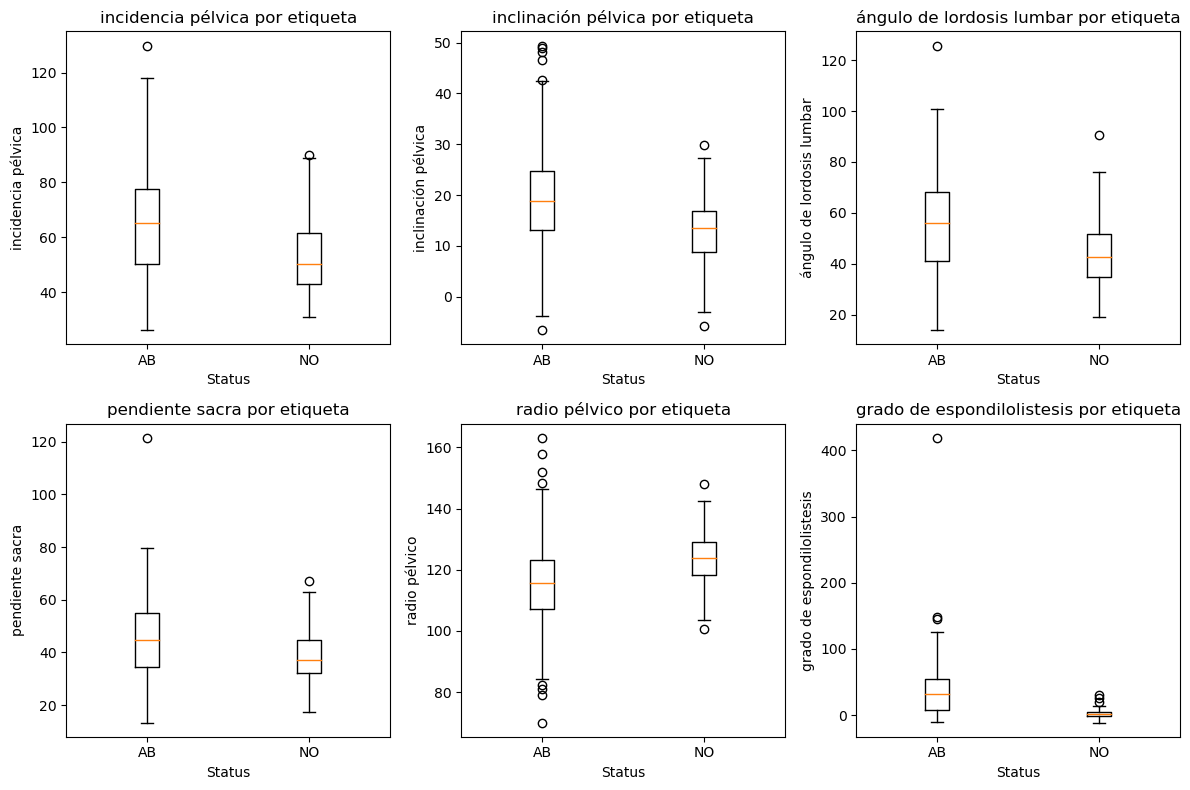

In [51]:
# Obtener las etiquetas únicas de la columna 'Label'
unique_labels = df["status"].unique()

# Calcular el número de filas y columnas en la matriz de subplots
num_rows = 2
num_cols = 3

# Crear subplots con la matriz de disposición
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Iterar a través de las columnas y subplots
for i, column in enumerate(df.columns[:-1]):  # Excluye la última columna (etiqueta)
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    # Crear boxplots separados por etiquetas
    data = [df[df["status"] == label][column] for label in unique_labels]
    ax.boxplot(data, labels=unique_labels)
    
    ax.set_xlabel("Status")
    ax.set_ylabel(column)
    ax.set_title(f'{column} por etiqueta')

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()

- Se observa que en terminos generales el grupo "AB" posee una desviación estandar más alta en todas las carácteristicas.
- En esto se nota que "grado de espondilolistesis" representa una gran diferencia entre un grupo y otro respecto a la desviación estandar y principalmente en que toma valores muy altos para "AB".
- Como regla general parece ser que "AB" posee valores más altos en sus carácteristicas respecto a "NO" salvo talvez en "radio pélvico".
- Por simple inspección no se descarta que las distribuciones no sean normales, a excepción de "grado de espondilolistesis".

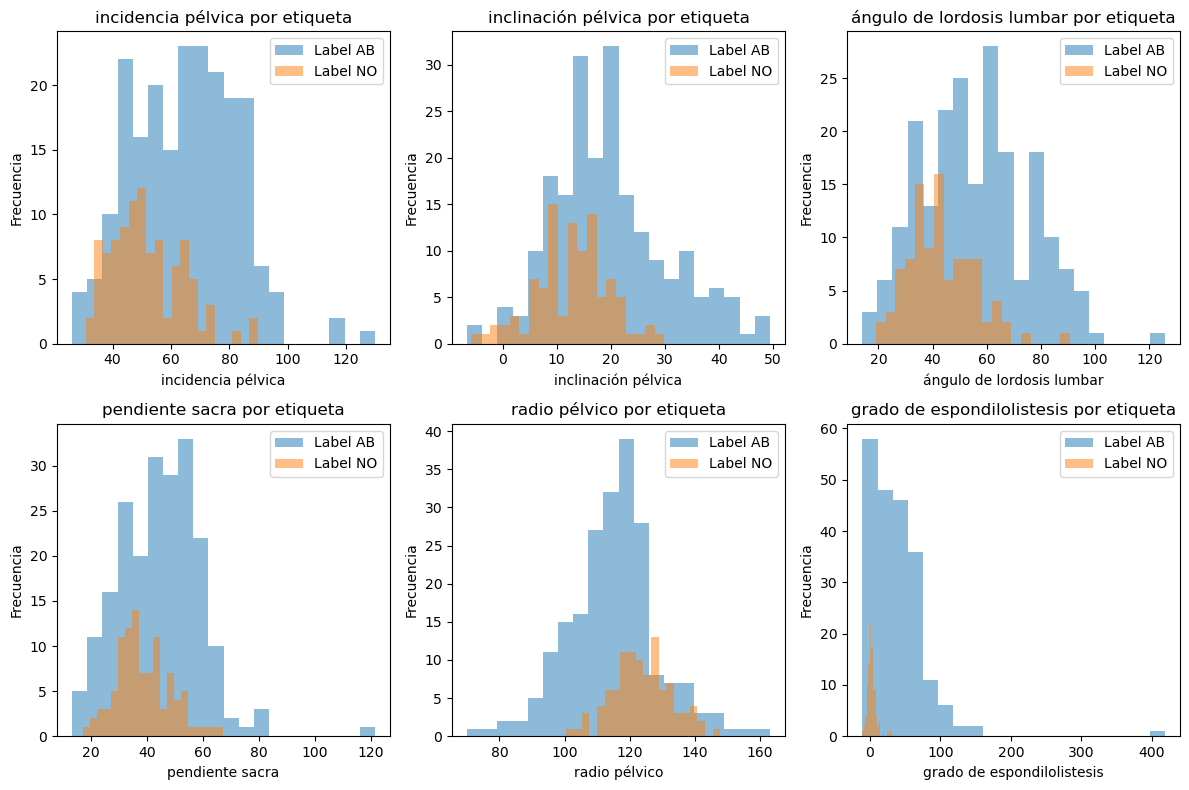

In [52]:
# Obtener las etiquetas únicas de la columna 'Label'
unique_labels = df["status"].unique()

# Calcular el número de filas y columnas en la matriz de subplots
num_rows = 2
num_cols = 3

# Crear subplots con la matriz de disposición
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Iterar a través de las columnas y subplots
for i, column in enumerate(df.columns[:-1]):  # Excluye la última columna (etiqueta)
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    for label in unique_labels:
        data_label = df[df["status"] == label][column]
        ax.hist(data_label, bins=20, alpha=0.5, label=f'Label {label}')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'{column} por etiqueta')
    ax.legend()

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()


Con los gráficos se refuerza la hipótesis de normalidad expresada en el último punto, además en conjunto con el análisis de las medidas de tendencia central se puede intuir que las distribuciones por parecidas que parezcan pueden diferir en su media.

## **<span style="color:red">c.</span>** Para diferentes parejas de covariables, reporte los gráficos de dispersión (es decir, grafique $X_i$ versus $X_j$) usando diferentes colores/símbolos de acuerdo a las distintas etiquetas. Comente los patrones que observa en estos gráficos.

Para esto estudiemos los datos en su conjunto y luego separando por target.

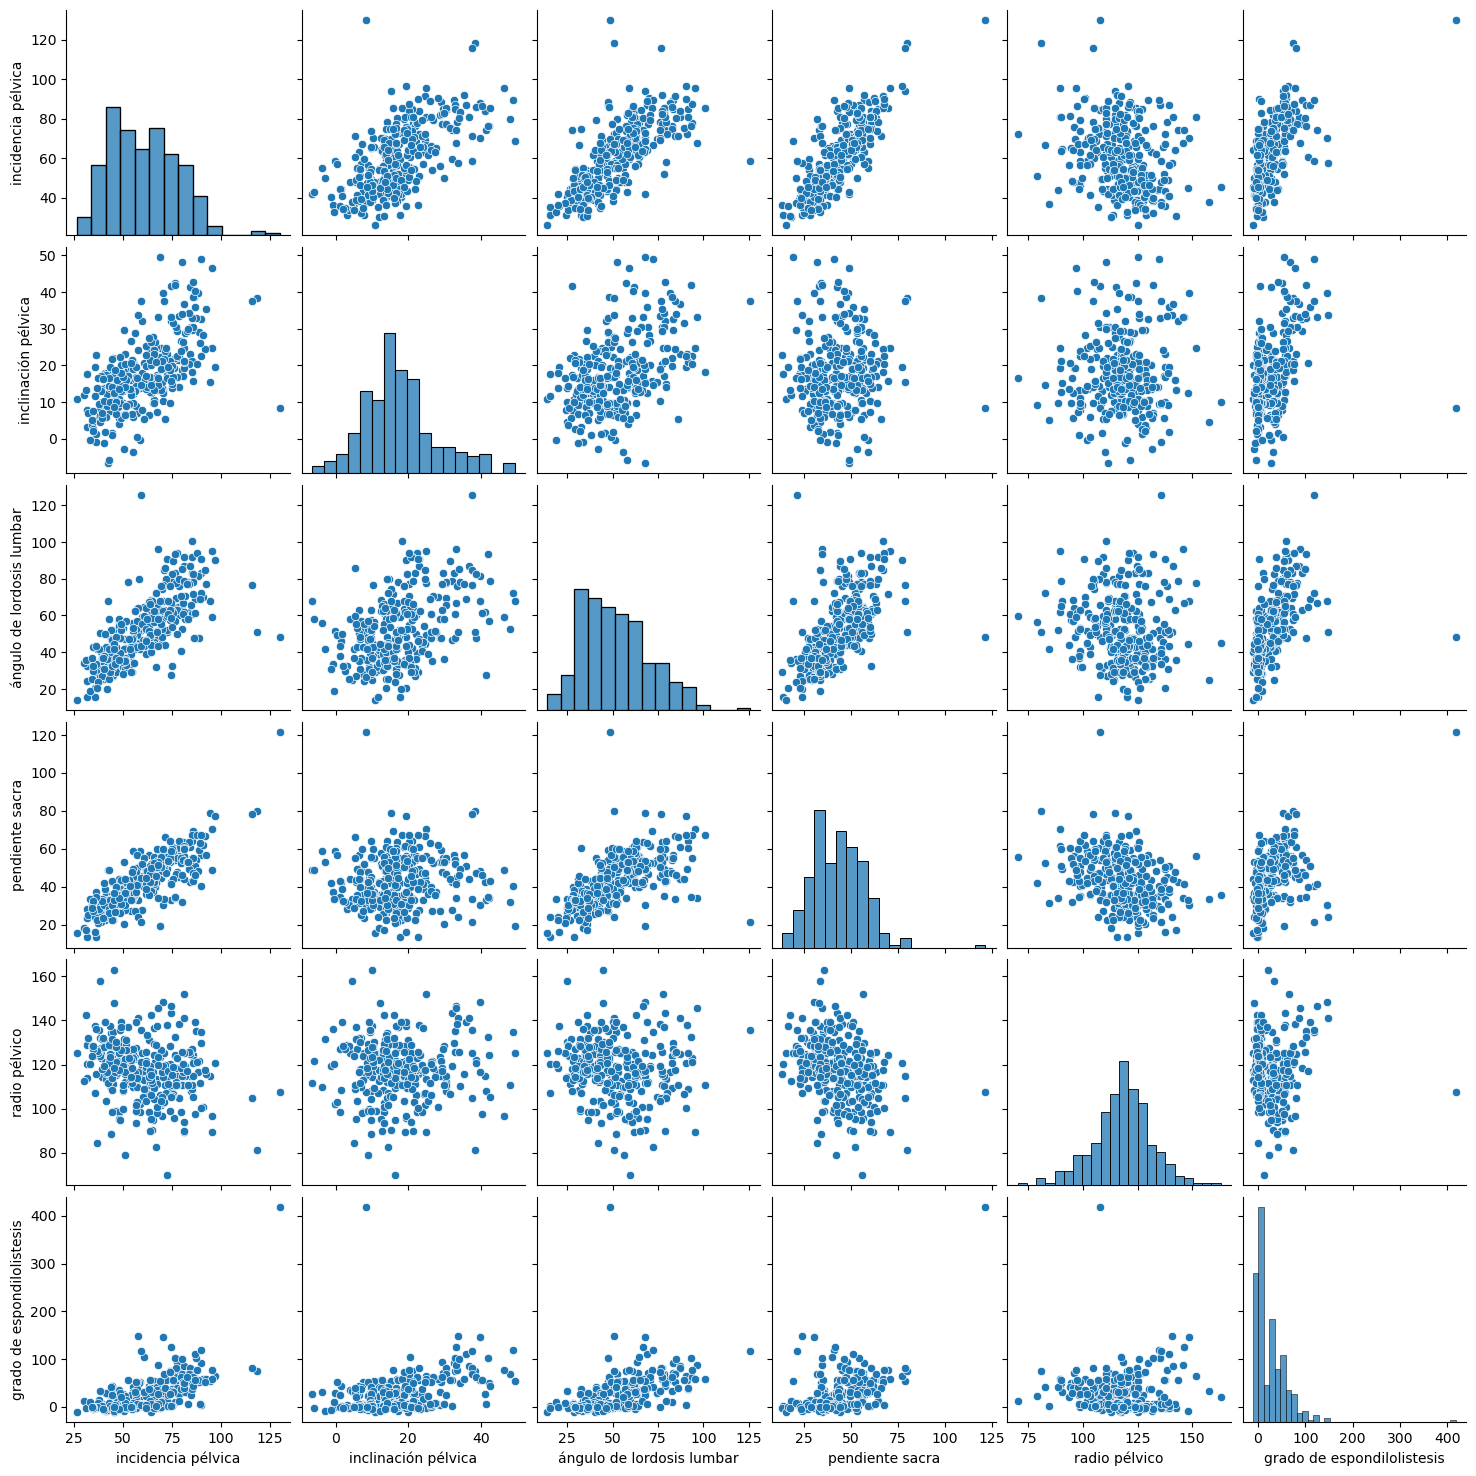

In [53]:
sns.pairplot(df);

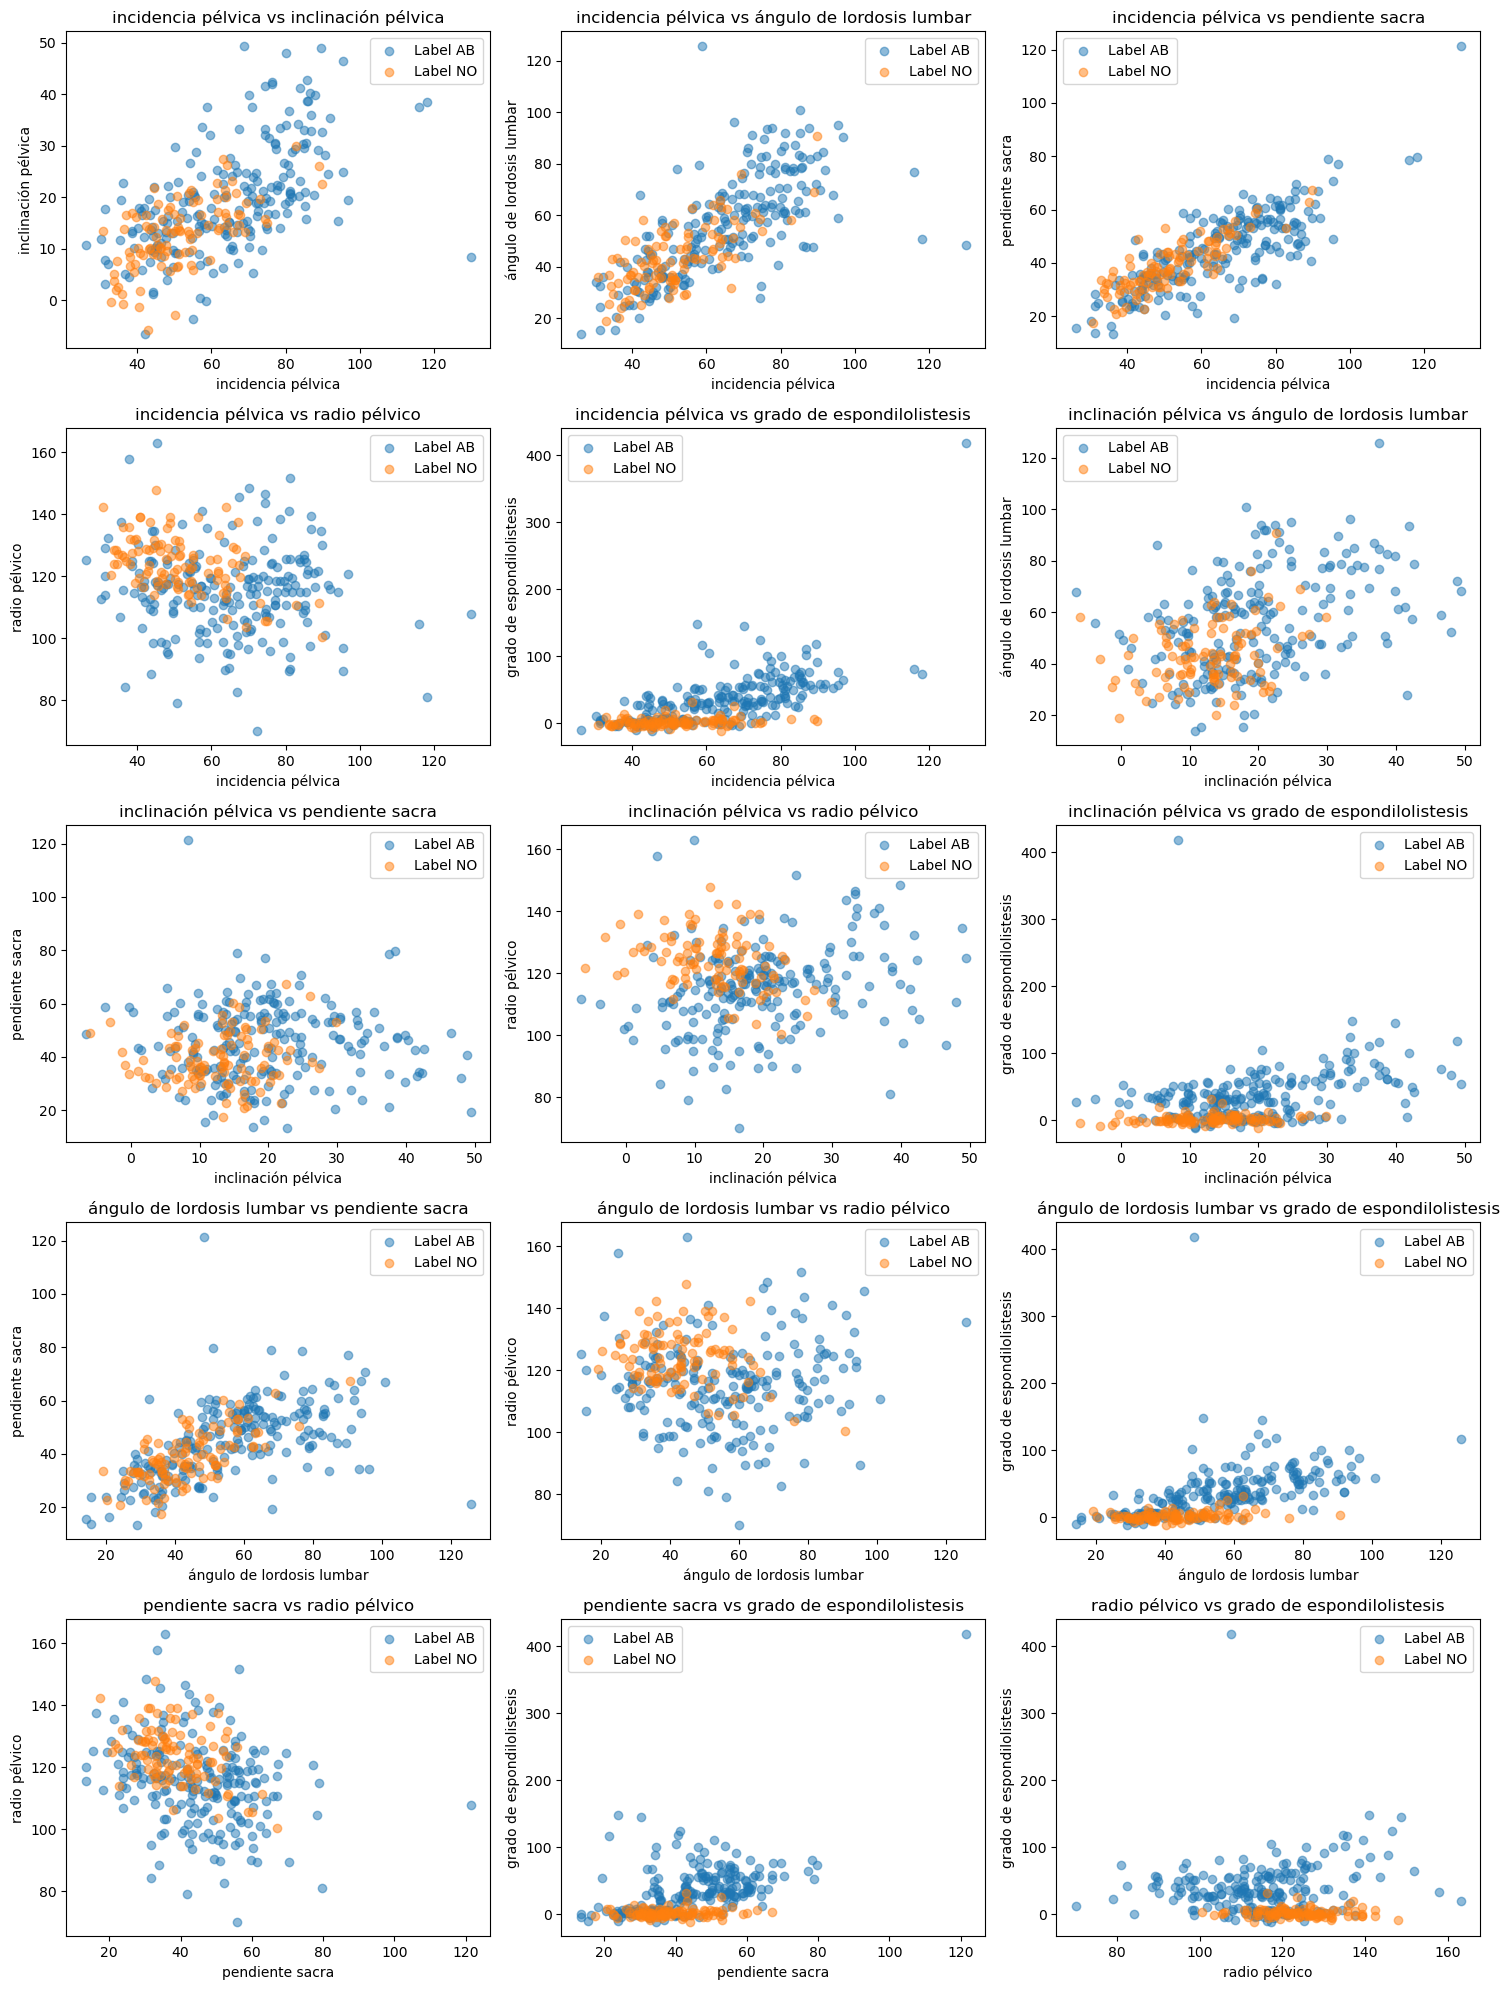

In [54]:
# Calcular el número de filas y columnas en la matriz de subplots
num_rows = 5
num_cols = 3

# Crear subplots con la matriz de disposición
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots

# Generar todas las combinaciones posibles de pares de covariables
covariables = df.columns[:-1]  # Excluye la última columna (etiqueta)
covar_combinations = list(combinations(covariables, 2))

# Iterar a través de las combinaciones y subplots
for i, (x_col, y_col) in enumerate(covar_combinations):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col]
    
    # Crear scatterplot separado por etiquetas
    for label in unique_labels:
        data_x = df[df["status"] == label][x_col]
        data_y = df[df["status"] == label][y_col]
        ax.scatter(data_x, data_y, label=f'Label {label}', alpha=0.5)
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')
    ax.legend()

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()


- Observando los primeros 3 gráficos (izquierda a derecha) se puede observar cierta relación proporcional que puede indicar una fuerte correlación que se estudiará con heatmap.
- Por la diferencia de magnitud entre los "grados de espondilolistesis" de los grupos "AB" y "NO" no se puede observar si existe o no algún tipo de relación para los grupos "AB" en dicha carácteristica respecto al resto.

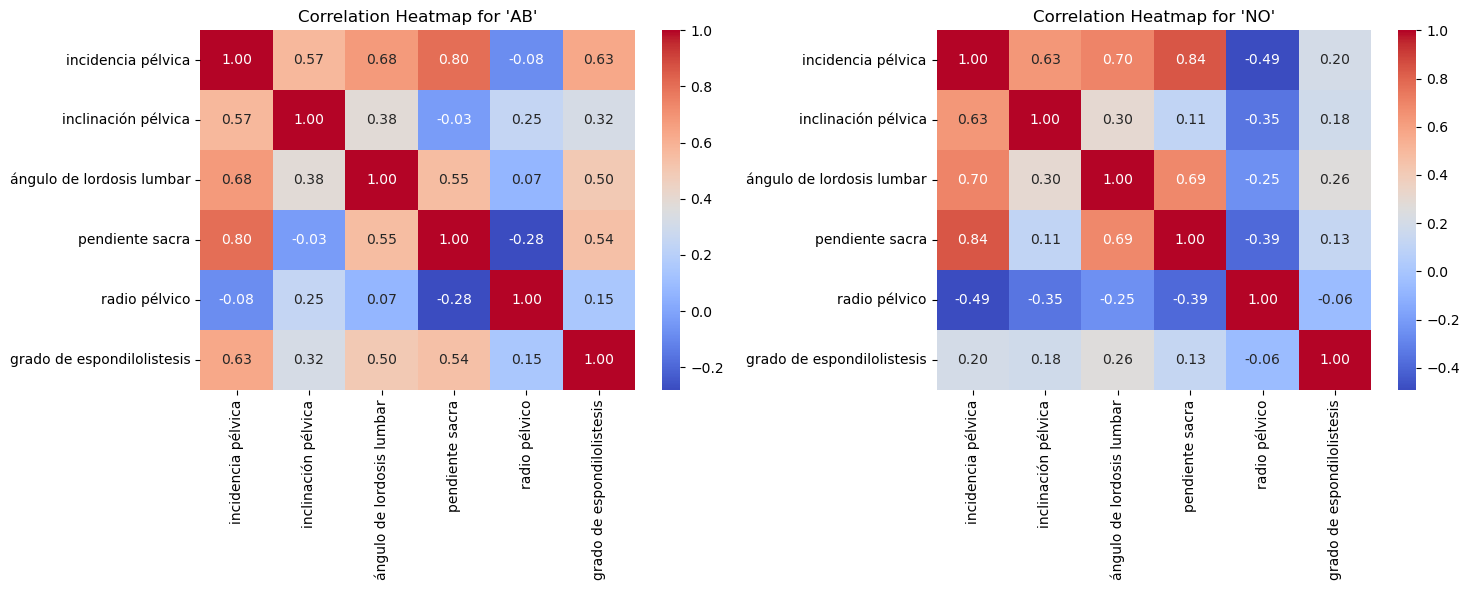

In [55]:
# Separate data based on unique 'status' values
unique_statuses = df['status'].unique()

# Create a DataFrame without the 'status' column
temp = df.drop(['status'], axis=1)

# Calculate correlation matrices for each 'status' value
correlation_matrices = {}
for status in unique_statuses:
    status_data = temp[df['status'] == status]
    correlation_matrix = status_data.corr()
    correlation_matrices[status] = correlation_matrix

# Create a 1x2 grid for the correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot correlation heatmaps for each 'status'
for i, (status, correlation_matrix) in enumerate(correlation_matrices.items()):
    ax = axes[i]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f"Correlation Heatmap for '{status}'")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Note que las hipótesis fueron correctas, existen datos fuertemente correlaciones como por ejemplo "pendiente sacra" y "incidencia pélvica" entre otros, lo cuál puede suponer problemas para modelos que trabajen bajo supuestos de independencia y puede motivar a la eliminación de carácteristicas para disminuir el riesgo de colinealidad o bien el uso de métodos de reducción de dimensionalidad.

Desde un análisis de datos, se recalca que en el grupo "AB" existe una correlación moderada de "grado de espondilolistesis" con respecto al resto de variables, la cual no se ve presente en el grupo "NO".

Estos casos mencionados no son los únicos, estas dos carácteristicas se repiten para otros features, notese el caso del "radio pélvico" cono "incidencia pélvica".

## **<span style="color:red">d.</span>** Ajuste un modelo de regresión logística con todas las covariables. Reporte y comente los resultados obtenidos.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('status', axis=1)  # Dado que 'status' es la etiqueta objetivo
y = df['status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) # random state for reproducibility 

### Mediante `Scikitlearn`

In [57]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.90


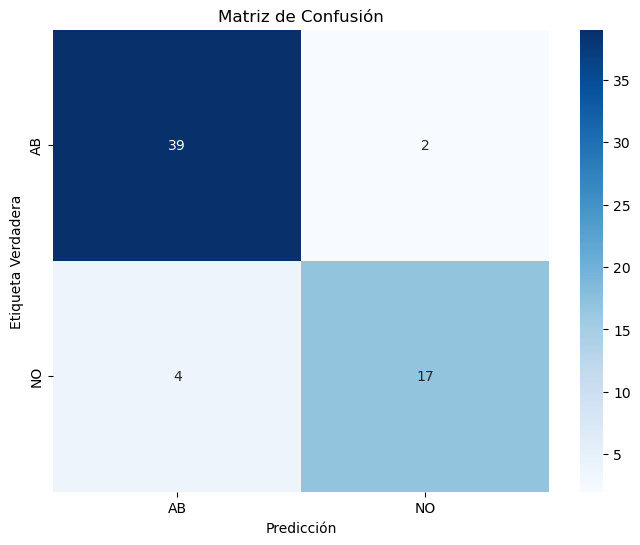

In [58]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Definir los nombres de las etiquetas
label_names = model.classes_  # Reemplaza con los nombres correctos

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_names, yticklabels=label_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


Pese a los problemas de colinealidad parece ser que la regresión logistica tiene un buen desempeño observado en la matriz de confusión.

### Mediante `Statsmodels`

In [60]:
import statsmodels.api as sm

y_trainstats = y_train.replace({'NO':0, 'AB':1})

logit_model = sm.Logit(y_trainstats, sm.add_constant(X_train)).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.301000
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  248
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Sep 2023   Pseudo R-squ.:                  0.5190
Time:                        12:58:55   Log-Likelihood:                -74.648
converged:                       True   LL-Null:                       -155.19
Covariance Type:            nonrobust   LLR p-value:                 3.486e-32
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         14.1506      3.405      4.156      0.000      

## **<span style="color:red">e.</span>** Con el modelo ajustado en el inciso anterior prediga la etiqueta de un paciente con las siguientes características:
$$
(X_1,X_2,X_3,X_4,X_5,X_6)=(60,20,50,50,100,10)
$$

In [61]:
# Nueva observación en el mismo formato que tus datos originales
new_observation = [[60, 20, 50, 50, 100, 10]]

# Crear un DataFrame temporal para la nueva observación
new_df = pd.DataFrame(new_observation, columns=X.columns)

# Realizar la predicción
predicted_label = model.predict(new_df)

print(f'Etiqueta predicha para la nueva observación: {predicted_label[0]}')

Etiqueta predicha para la nueva observación: AB


## **<span style="color:red">f.</span>** ¿Es razonable disminuir el número de covariables? Justifique su análisis rigurosamente.

Es razonable disminuir el número de covariables dado que existen pares de covariables altamente correlacionadas sin importar el grupo al que pertenencen, por lo cuál para un modelo de regresión esta carácteristica puede ser redundante mientras que para otro modelo que asuma independencia, puede afectar su capacidad predictiva, en ambos casos, la presencia de covariables con alta correlación tiene un efecto negativo y por ende es recomendable eliminar columnas de manera conveniente.

Para decidir que columna eliminar o que método aplicar para solventar este problema se utilizará el test de Wald. Para esto notemos que en un punto anterior se observa que `pendiente sacra` entrega un mayor valor de `P>|z|`, por lo tanto eliminando dicha columna:

In [62]:
X_trainstats = X_train.drop(columns=['pendiente sacra'])
logit_model = sm.Logit(y_trainstats, sm.add_constant(X_trainstats)).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.301934
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  248
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Sep 2023   Pseudo R-squ.:                  0.5175
Time:                        12:58:55   Log-Likelihood:                -74.880
converged:                       True   LL-Null:                       -155.19
Covariance Type:            nonrobust   LLR p-value:                 7.291e-33
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         14.1441      3.422      4.133      0.000      

ahora se elimina `ángulo de lordosis lumbar`

In [63]:
X_trainstats = X_train.drop(columns=['pendiente sacra', 'ángulo de lordosis lumbar'])
logit_model = sm.Logit(y_trainstats, sm.add_constant(X_trainstats)).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.303380
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  248
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Sep 2023   Pseudo R-squ.:                  0.5152
Time:                        12:58:55   Log-Likelihood:                -75.238
converged:                       True   LL-Null:                       -155.19
Covariance Type:            nonrobust   LLR p-value:                 1.532e-33
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         14.5251      3.409      4.261      0.000      

con lo que se obtiene un modelo con todas las covariables significativas. Notese que se debe hacer la eliminación de un valor y un valor dado que la significancia dada por el test depende de las otras covariables.

## **<span style="color:red">g.</span>** ¿Es adecuado utilizar el método de Bayes ingenuo en este conjunto de datos? Justifique su respuesta.

No es adecuado utilizar este modelo ya que asume independencia entre las covariables, lo cual en los puntos anteriores se vió fuertemente criticado por la alta presencia de correlación. Puede ser más adecuado considerar este nuevo modelo con las columnas que pueden ser "redundantes" eliminadas.

## **<span style="color:red">h.</span>** Independientemente de la respuesta del inciso anterior, ajuste un modelo de Bayes ingenuo. Reporte las funciones de densidad estimadas. Comente sus resultados.

`Respuesta`: Para estimar las funciones de densidad y en base a los gráficos anteriores, asumiremos normalidad y trabajaremos en R en el anexo.

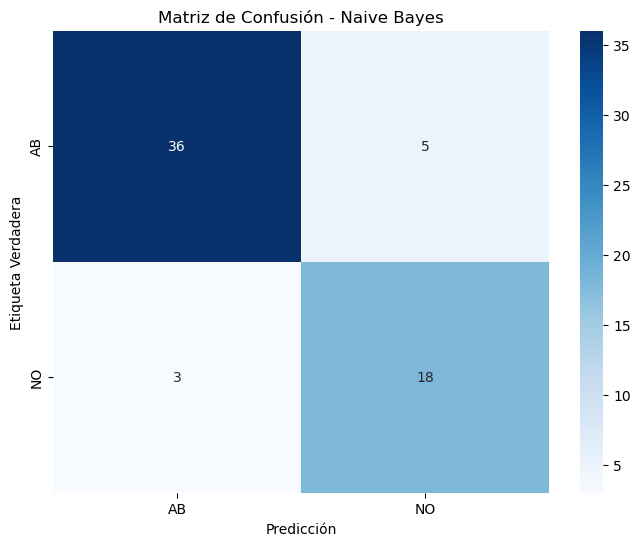

In [64]:
from sklearn.naive_bayes import GaussianNB

# Crear y entrenar el modelo de Bayes ingenuo
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=naive_bayes_model.classes_, yticklabels=naive_bayes_model.classes_)
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Para trabajar se considerará el trabajo realizado en Python, el paso por R fue necesario para estimar las funciones de densidades.

Observando los gráficos, se podría especular que el modelo puede fallar al tener densidades parecidas en localización (salvo la última variable).

## **<span style="color:red">i.</span>** Ajuste un árbol de clasificación. Reporte y comente sus resultados.

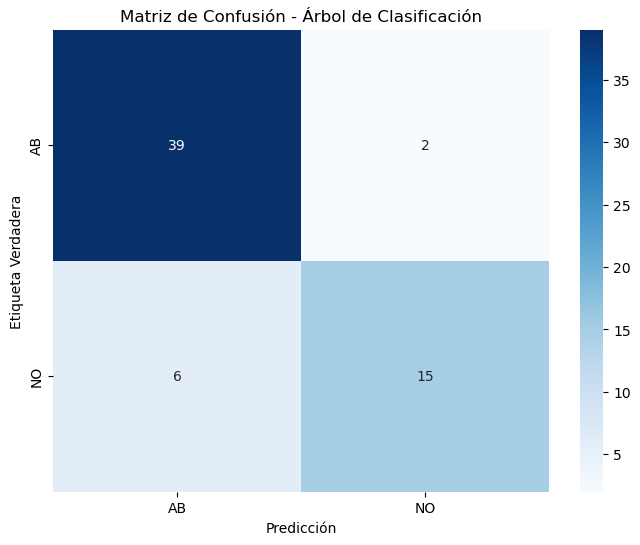

In [65]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de clasificación
decision_tree_model = DecisionTreeClassifier(random_state=43)
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=decision_tree_model.classes_, yticklabels=decision_tree_model.classes_)
plt.title('Matriz de Confusión - Árbol de Clasificación')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()


## **<span style="color:red">j.</span>** Use los ajustes de los incisos **<span style="color:red">h.</span>** y **<span style="color:red">i.</span>** para predecir la etiqueta de un paciente con las mismas características que en el inciso **<span style="color:red">e.</span>** ¿La conclusión coincide con la regresión logística?

In [66]:
# Realizar la predicción
predicted_label_regression = model.predict(new_df)
print(f'Etiqueta predicha mediante logistic regression: {predicted_label_regression[0]}')

predicted_label_bayes = naive_bayes_model.predict(new_df)
print(f'Etiqueta predicha mediante Naive Bayes: {predicted_label_bayes[0]}')

predicted_label_tree = decision_tree_model.predict(new_df)
print(f'Etiqueta predicha mediante Decision Tree: {predicted_label_tree[0]}')

Etiqueta predicha mediante logistic regression: AB
Etiqueta predicha mediante Naive Bayes: AB
Etiqueta predicha mediante Decision Tree: NO


# Trabajo en R

In [14]:
path <- "column_2C.txt"

# Nombres de las columnas
names_columns <- c(
  "incidencia_pelvica",
  "inclinacion_pelvica",
  "angulo_de_lordosis_lumbar",
  "pendiente_sacra",
  "radio_pelvico",
  "grado_de_espondilolistesis",
  "status"
)

# Leer el archivo de texto y crear el dataframe
datos <- read.table(path, header = FALSE, sep = " ")
colnames(datos) <- names_columns

# Imprimir el dataframe
head(datos)

# Convertir 'tipo' en una variable categórica
datos$status <- as.factor(datos$status)

# Contar por tipo
table(datos$status)

incidencia_pelvica,inclinacion_pelvica,angulo_de_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_de_espondilolistesis,status
63.03,22.55,39.61,40.48,98.67,-0.25,AB
39.06,10.06,25.02,29.00,114.41,4.56,AB
68.83,22.22,50.09,46.61,105.99,-3.53,AB
69.30,24.65,44.31,44.64,101.87,11.21,AB
49.71,9.65,28.32,40.06,108.17,7.92,AB
40.25,13.92,25.12,26.33,130.33,2.23,AB



 AB  NO 
210 100 

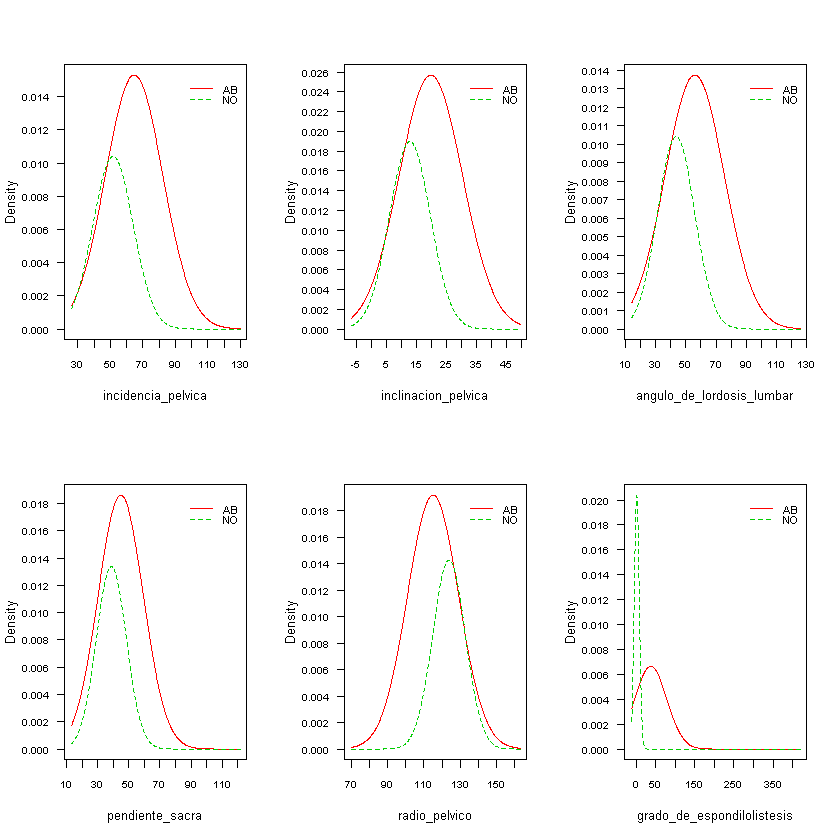

In [16]:
#install.packages("naivebayes")

library("naivebayes")# Ruta del archivo

# Ajustar un modelo de Bayes Ingenuo
modelo <- naive_bayes(status ~ incidencia_pelvica 
                        + inclinacion_pelvica 
                        + angulo_de_lordosis_lumbar 
                        + pendiente_sacra + radio_pelvico 
                        + grado_de_espondilolistesis, data = datos, usekernel = F)
# Particionar el espacio de gráficos
par(mfrow = c(2, 3))

# Generar los gráficos del modelo
plot(modelo)

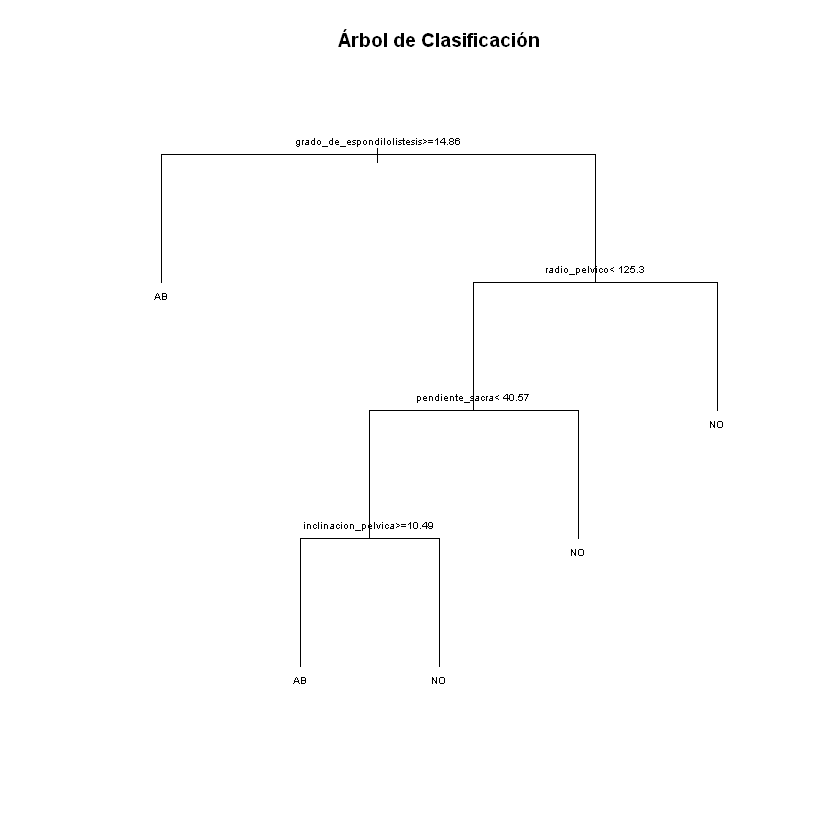

In [18]:
#install.packages("rpart")

# Cargar la librería necesaria para árboles de clasificación
library("rpart")

# Ajustar el árbol de clasificación
arbol <- rpart(status ~ incidencia_pelvica + inclinacion_pelvica + angulo_de_lordosis_lumbar +
               pendiente_sacra + radio_pelvico + grado_de_espondilolistesis, data = datos)

# Personalizar el estilo del gráfico
par(cex=0.8)  # Reducir el tamaño de la fuente en el gráfico
plot(arbol, uniform = TRUE, main = "Árbol de Clasificación", margin = 0.1)
text(arbol, cex = 0.6)  # Ajustar el tamaño de la fuente del texto